## Mammographic-masses 

"Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes." [1](http://archive.ics.uci.edu/ml/datasets/mammographic+mass)


The objective of this notebook is to create an complete analysis about the dataset porpused by  by the [Frank Kane](https://www.linkedin.com/in/fkane/) as a final project of the course provided at udemy called [Machine Learning, Data Science and Deep Learning with Python](https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-on/) that i highly recomend you if believes that you belongs the field of data.

After that the best model is going to be on production in a website i will develop.


### What you're going to find here?

#### ✅ Data QA
* Dimensions of dataset.
* Data type.
* Detect nulls, na and duplicates.
* Develop an estrategy about the results mentiones above.
* Detect inconsistences and develop a strategy about ones found.
* Conclusions about Data QA

#### 📊 Reporting
* Univariate analysis.
* Detect outliers and develop and strategy to treat them.
* Bivariate analysis.
* Distribution of features respect to the target
* Conclusions about Reporting

#### 🤖 Machine Learning
* Prepocess data (dummies, encoders, normalize, etc)
* Develop Machine learning models (Desition Trees, Random forest, KNN, Naive Bayes, SVM, NN provided by Keras)
* Tune hyperparams.
* Mesure all models.
* Feature importance for the model selected.
* Conclusions about Machine Learning.

Hope you enjoy that! Let's move on!


### Columns 
1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)


### Import libraries

In [1]:
import math

#Oculto los warnings 
import warnings

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB

# CategoricalNB is used because the fits better with the definition: "is suitable for classification 
# with discrete features that are categorically distributed".
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
cols = ['BI-RADS assessment', 'Age', 'Shape','Margin','Density','Severity']
predictive_attributes = ['Age', 'Shape','Margin','Density']
non_predictive_attribute = 'BI-RADS assessment'
taget = 'Severity'

df = pd.read_csv('training_data/mammographic_masses.data.txt',na_values=['?'],names = cols).reset_index(drop=True)
df.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


### Data QA

**Shape**

In [3]:
df.shape

(961, 6)

**Info about data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  959 non-null    float64
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    float64
 3   Margin              913 non-null    float64
 4   Density             885 non-null    float64
 5   Severity            961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


**Main stadistics about features**

In [5]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


**Null values**

In [6]:
df.isna().sum()

BI-RADS assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64

**Duplicated values**

In [7]:
df.duplicated().sum()

272

**Inconsistences**

In [8]:
df[df['Age']<0]

,BI-RADS assessment,Age,Shape,Margin,Density,Severity


#### Solving problems about null values

In [9]:
len(df.dropna())/len(df)

0.8636836628511967

15% of rows are nulls. Although ~15% is high, i'll drop this registers because the problem it's very particular about the woman, so filling with an estrategy i thnik it's not a good idea

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,57.0,1.0,5.0,3.0,1
4,5.0,76.0,1.0,4.0,3.0,1
...,...,...,...,...,...,...
825,4.0,47.0,2.0,1.0,3.0,0
826,4.0,56.0,4.0,5.0,3.0,1
827,4.0,64.0,4.0,5.0,3.0,0
828,5.0,66.0,4.0,5.0,3.0,1


**Conclusions about Data QA**

* The dataset contains 961 rows and each row is described by 6 features.
* All columns has null values.
* There are 272 row duplicated. 
* No relevant inconsistences were found.
* After drop null values, there are 830 rows in the dataset.

### Reporting

**Univariate analysis**

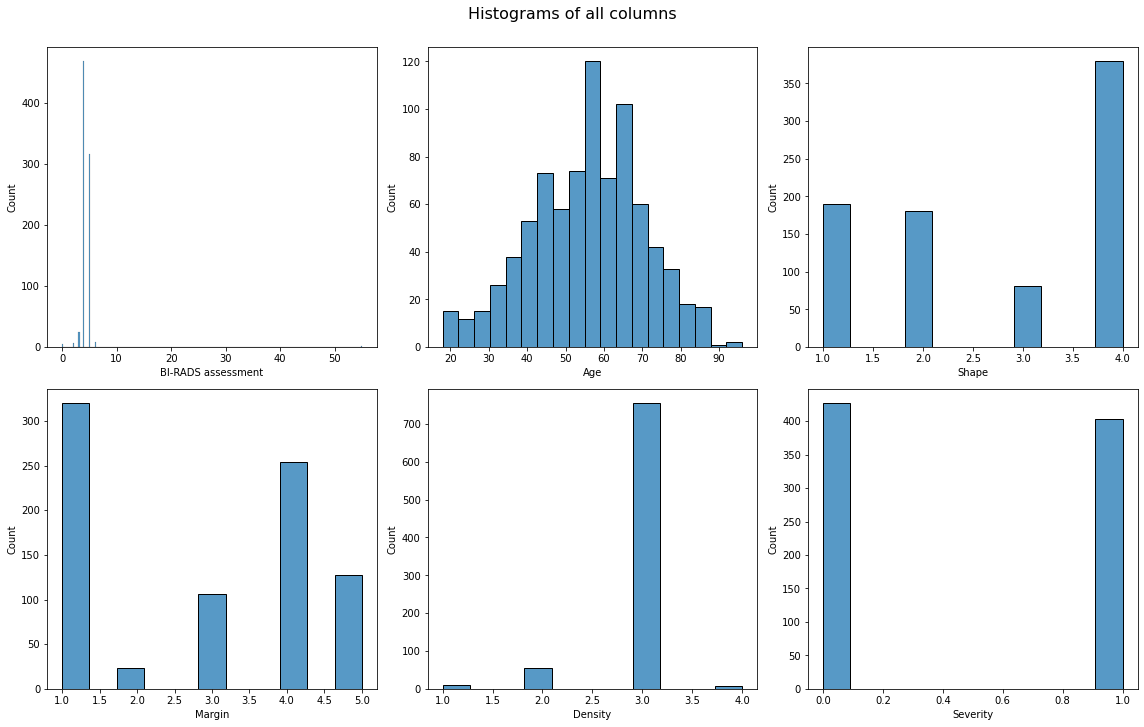

In [12]:
# Parametrized plot
cols = list(df.columns)
subplots_n_cols = 3
subplots_n_rows = math.ceil(len(cols) / subplots_n_cols)
fig, axes = plt.subplots(
    subplots_n_rows,
    subplots_n_cols,
    figsize=(16,10)
)
axes = axes.ravel()
cmap = sns.light_palette("seagreen", as_cmap=True)

for i, ax in enumerate(axes):
    sns.histplot(x=cols[i],
               data=df,
               ax=ax,) 
    
fig.suptitle("Histograms of all columns",
    size=16,
    y=1.005,
)

plt.tight_layout()
plt.show()


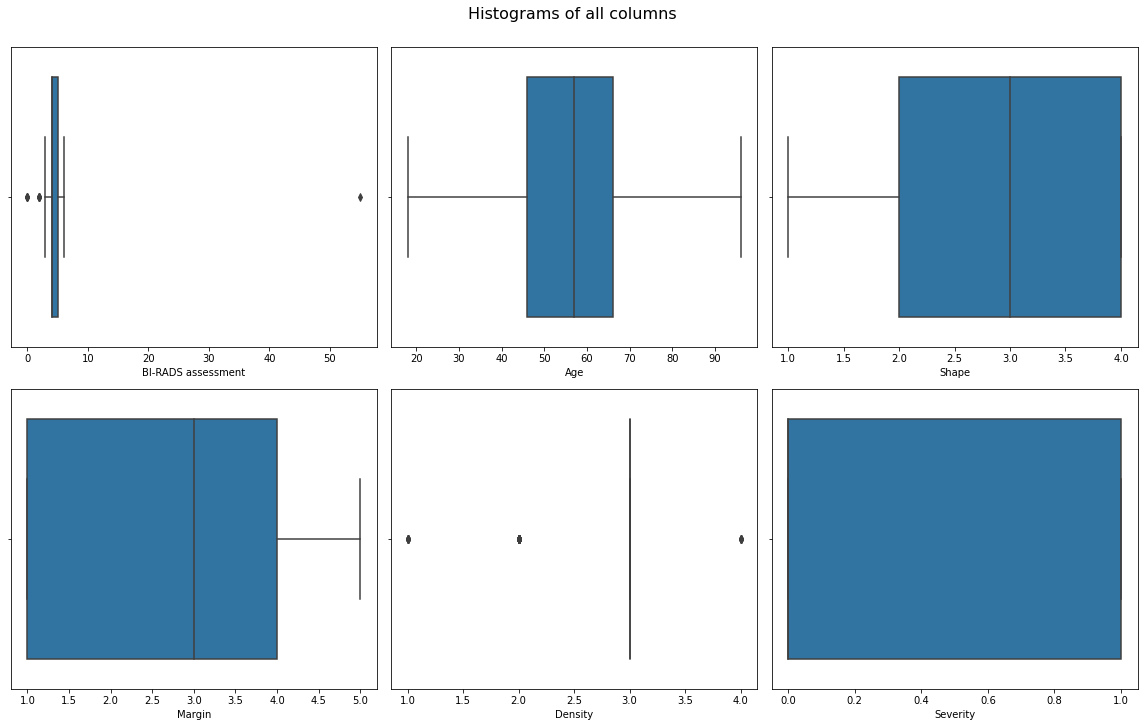

In [13]:
# Parametrized plot
cols = list(df.columns)
subplots_n_cols = 3
subplots_n_rows = math.ceil(len(cols) / subplots_n_cols)
fig, axes = plt.subplots(
    subplots_n_rows,
    subplots_n_cols,
    figsize=(16,10)
)
axes = axes.ravel()
cmap = sns.light_palette("seagreen", as_cmap=True)

for i, ax in enumerate(axes):
    sns.boxplot(x=cols[i],
                data=df,
                ax=ax)    
    
fig.suptitle("Histograms of all columns",
    size=16,
    y=1.005,
)

plt.tight_layout()
plt.show()

**Bivariate analysis**

Distribution of features respect to the target

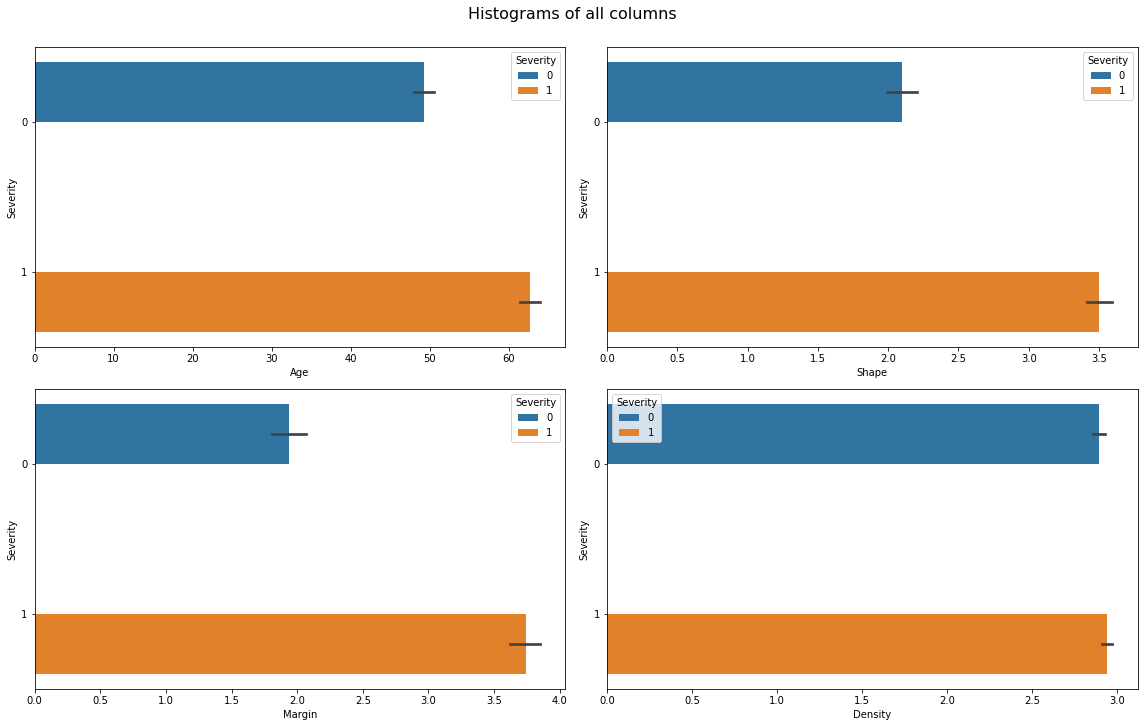

In [14]:
# Parametrized plot
cols = predictive_attributes
subplots_n_cols = 2
subplots_n_rows = math.ceil(len(cols) / subplots_n_cols)
fig, axes = plt.subplots(
    subplots_n_rows,
    subplots_n_cols,
    figsize=(16,10)
)
axes = axes.ravel()
cmap = sns.light_palette("seagreen", as_cmap=True)

for i, ax in enumerate(axes):
    sns.barplot(x= cols[i],
                y='Severity',
                hue="Severity",
                orient = 'h',
                data = df,
                ax=ax) 
    
fig.suptitle("Histograms of all columns",
    size=16,
    y=1.005,
)

plt.tight_layout()
plt.show()

**Correlation matrix**

Text(0.5, 1.0, 'Correlation matrix')

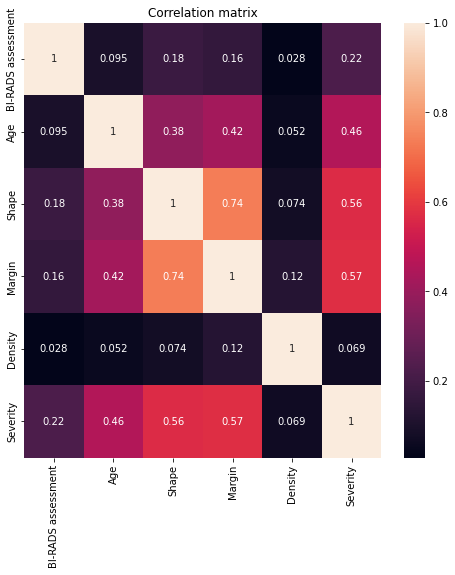

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.heatmap(df.corr(method="pearson"),
            annot=True,
            ax=ax)
plt.title("Correlation matrix")

In [16]:
# Severityt must be considered as categorical
df['Severity'] = df['Severity'].astype('category') 

**Conclusions about Reporting**

* BI-RADS has values hiigher than 5. Those must be dropped.
* Severity (target) is balanced.
* Density has lot of row with value of 3 (~85%).
* Women over the age of 50 are more likely to be positive for breast cancer.
* Mass shape tagged as lobular or irregular are likely to be positive for breast cancer.
* Mass magin tagged as ill-defined and spiculated are likly to be positive for breast cancer.
* Both features with higher correlation with Severity are mass-magin and mass-shape.

### Machine Learning

**Prepocess data**

In [17]:
# So SKLearn library work with arrays as input i'll transform pd.Dataframe -> np.array both features and target.
x = df[predictive_attributes].values
y = df[taget].values

In [18]:
# Standardize features by removing the mean and scaling to unit variance
x_scaled = preprocessing.minmax_scale(x, feature_range=(0,1))

In [19]:
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV)
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    y,
                                                    test_size=0.2,
                                                   random_state = random_state)

**Training model with scaled data**

In [20]:
warnings.filterwarnings('ignore')

modelos=[{"name":"KNN", "model": KNeighborsClassifier()},
         {"name":"DecisionTreeClassifier", "model":DecisionTreeClassifier()},
         {"name":"RandomForestClassifier", "model":RandomForestClassifier()}, 
         {"name":"NaiveBayes", "model": CategoricalNB()},
         {"name":"SVM_SVC", "model": SVC()},
         {"name":"LogisticRegression", "model": LogisticRegression()}
        ]

best_params = []

for i in range(len(modelos)):
    if modelos[i].get('name') == 'KNN':
        
        parametros={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'n_neighbors':[5,6,8,9,10,12,15,20]}
        
        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros,
                                   scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })
        
    elif modelos[i].get('name') == 'DecisionTreeClassifier':
        
        parametros= {'criterion':['gini', 'entropy'],
                    'splitter':['best', 'random']}
        
        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros,
                                   scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })
    
    elif modelos[i].get('name') == 'RandomForestClassifier':
        
        parametros= {'criterion':['gini', 'entropy'],
                      'n_estimators':[1,5,10,20,50]}
        
        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros,
                                   scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })
        
    elif modelos[i].get('name') == 'NaiveBayes':
        
        parametros= {'alpha':[0.2,0.4,0.6,0.8,1],
                    'fit_prior':[True, False],
                    'min_categories':[2,3,4]} 
        
        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros,
                                   scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })
    
    elif modelos[i].get('name') == 'SVM_SVC':
        parametros= {'kernel':['rbf', 'linear', 'poly'],
                    'gamma': ['scale', 'auto'],
                    'C':[1.,5.,10.]}

        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros,
                                   scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })
    
    elif modelos[i].get('name') == 'LogisticRegression':
        parametros={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'C': [100, 10, 1.0, 0.1, 0.01]}
        
        grid_search = GridSearchCV(modelos[i].get('model'),
                                   param_grid=parametros, 
                                   scoring='accuracy',
                                  )
        grid_search.fit(x_train, y_train)
        best_params.append({
            'model':modelos[i].get('name'),
            'best_params':grid_search.best_params_,
            'best_score':grid_search.best_score_
        })

In [21]:
# Pre-processing the values for the nn
x_train_nn = x_train.astype('float32')
x_test_nn = x_test.astype('float32')

y_train_nn = keras.utils.to_categorical(y_train.astype('float32'),2)
y_test_nn = keras.utils.to_categorical(y_test.astype('float32'),2)

In [22]:
def model_nn():
    mlp_model = Sequential()
    mlp_model.add(Dense(4,activation='relu',input_shape=(4,)))
    mlp_model.add(Dense(8,activation='relu'))
    mlp_model.add(Dense(2,activation='softmax'))
    return mlp_model

In [23]:
mlp_model = model_nn()
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


2022-02-13 19:22:51.527658: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
mlp_model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [25]:
history = mlp_model.fit(x= x_train_nn,
                   y= y_train_nn,
                   batch_size=20,
                   epochs= 100,
                   verbose=2,
                   validation_data=(x_test_nn,
                                    y_test_nn)
                   )

Epoch 1/100
34/34 - 0s - loss: 0.7664 - accuracy: 0.4910 - val_loss: 0.7373 - val_accuracy: 0.4639 - 467ms/epoch - 14ms/step
Epoch 2/100
34/34 - 0s - loss: 0.7135 - accuracy: 0.5000 - val_loss: 0.6978 - val_accuracy: 0.5120 - 59ms/epoch - 2ms/step
Epoch 3/100
34/34 - 0s - loss: 0.6804 - accuracy: 0.6401 - val_loss: 0.6697 - val_accuracy: 0.6506 - 51ms/epoch - 2ms/step
Epoch 4/100
34/34 - 0s - loss: 0.6548 - accuracy: 0.7063 - val_loss: 0.6480 - val_accuracy: 0.7108 - 52ms/epoch - 2ms/step
Epoch 5/100
34/34 - 0s - loss: 0.6375 - accuracy: 0.7455 - val_loss: 0.6342 - val_accuracy: 0.7410 - 52ms/epoch - 2ms/step
Epoch 6/100
34/34 - 0s - loss: 0.6253 - accuracy: 0.7575 - val_loss: 0.6230 - val_accuracy: 0.7590 - 59ms/epoch - 2ms/step
Epoch 7/100
34/34 - 0s - loss: 0.6161 - accuracy: 0.7590 - val_loss: 0.6131 - val_accuracy: 0.7711 - 52ms/epoch - 2ms/step
Epoch 8/100
34/34 - 0s - loss: 0.6064 - accuracy: 0.7741 - val_loss: 0.6030 - val_accuracy: 0.7892 - 52ms/epoch - 2ms/step
Epoch 9/100
34

Epoch 68/100
34/34 - 0s - loss: 0.4613 - accuracy: 0.8012 - val_loss: 0.4269 - val_accuracy: 0.8494 - 49ms/epoch - 1ms/step
Epoch 69/100
34/34 - 0s - loss: 0.4619 - accuracy: 0.7982 - val_loss: 0.4271 - val_accuracy: 0.8494 - 48ms/epoch - 1ms/step
Epoch 70/100
34/34 - 0s - loss: 0.4608 - accuracy: 0.8042 - val_loss: 0.4275 - val_accuracy: 0.8434 - 48ms/epoch - 1ms/step
Epoch 71/100
34/34 - 0s - loss: 0.4612 - accuracy: 0.8027 - val_loss: 0.4267 - val_accuracy: 0.8434 - 48ms/epoch - 1ms/step
Epoch 72/100
34/34 - 0s - loss: 0.4602 - accuracy: 0.7982 - val_loss: 0.4255 - val_accuracy: 0.8434 - 47ms/epoch - 1ms/step
Epoch 73/100
34/34 - 0s - loss: 0.4607 - accuracy: 0.7952 - val_loss: 0.4261 - val_accuracy: 0.8494 - 51ms/epoch - 1ms/step
Epoch 74/100
34/34 - 0s - loss: 0.4602 - accuracy: 0.7982 - val_loss: 0.4255 - val_accuracy: 0.8494 - 54ms/epoch - 2ms/step
Epoch 75/100
34/34 - 0s - loss: 0.4601 - accuracy: 0.7952 - val_loss: 0.4252 - val_accuracy: 0.8494 - 77ms/epoch - 2ms/step
Epoch 76

In [26]:
score = mlp_model.evaluate(x_test_nn,y_test_nn, verbose=0)
print("Total loss: ",score[0])
print("Total Accuracy: ", score[1])

Total loss:  0.42420077323913574
Total Accuracy:  0.8433734774589539


In [27]:
best_params.append({
            'model':'Multi Layer Perceptron',
            'best_params':history.params,
            'best_score': score[1]
})

In [28]:
df_best_params = pd.DataFrame(best_params)
df_best_params.sort_values(by='best_score', ascending=False)

,model,best_params,best_score
6,Multi Layer Perceptron,"{'verbose': 2, 'epochs': 100, 'steps': 34}",0.843373
4,SVM_SVC,"{'C': 10.0, 'gamma': 'auto', 'kernel': 'poly'}",0.807245
5,LogisticRegression,"{'C': 100, 'solver': 'newton-cg'}",0.796685
0,KNN,"{'algorithm': 'ball_tree', 'n_neighbors': 15}",0.793666
3,NaiveBayes,"{'alpha': 0.2, 'fit_prior': True, 'min_categor...",0.789177
2,RandomForestClassifier,"{'criterion': 'entropy', 'n_estimators': 50}",0.757519
1,DecisionTreeClassifier,"{'criterion': 'gini', 'splitter': 'best'}",0.719856


**Best Model:** Multi Layer Perceptron

**Conclusions about Machine Learning.**
* Score of all models selected are between 72.73% and 82.7%
* The model which better performance is a neural netwrok with 3 layers (1 input layer, and 2 dense leyers)
* SMV has a competitive accuracy considering its approach is simple than a Deep learning approach.
* The same for Logistic regression, a very simple approach returns acceptable results.
* Training time, of course the data set isn't too large, but the training time in all models are quiet similar

**Export the best model**

In [29]:
joblib.dump(mlp_model, 'mammo_classifier.pkl') 

2022-02-13 19:22:58.112797: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://5b11946f-5465-411f-b0d6-aa45876692bb/assets


['mammo_classifier.pkl']